# Q1
1. (2 mark) Implement the counting measure in Python. Test that it satisfies additivity on the disjoint sets
{"a", "b", "c"}, {"d", "e", "f"}.

Hint: If you have never written a Python function, read https://www.w3schools.com/python/python_
functions.asp, if you have never used Python sets, read https://www.w3schools.com/python/python_
sets.asp.

Bonus mark if your implementation of the counting measure checks that the input type is correct and
raises an error otherwise.


In [1]:
def counting_measure(user_set):
    try:
        if not type(user_set) is set:

            raise TypeError("Error! input type must be set")

        return len(user_set)
    
    except TypeError as e:
   
        print(f"A TypeError occurred: {e}")
    

Other version of the above function with implementing len() from scratch

In [2]:
def counting_measure_v2(user_set):
    try:
        if not type(user_set) is set:

            raise TypeError("Error! input type must be set")

        count = 0

        for i in user_set:
            count += 1

        return count
    
    except TypeError as e:
   
        print(f"A TypeError occurred: {e}")

Testing additivity on the disjoint sets
{"a", "b", "c"}, {"d", "e", "f"}.

In [3]:
set_1 = {"a", "b","c"}
set_2 = {"d", "e", "f"}
counting_measure(set_1.union(set_2)) == counting_measure(set_1) + counting_measure(set_2)

True

Testing type error

In [4]:
counting_measure((1,2,3))

A TypeError occurred: Error! input type must be set


In [5]:
counting_measure("hello")

A TypeError occurred: Error! input type must be set


In [6]:
counting_measure(set())

0

# Q2
(2 marks) Create a Python class which implements intervals. Use this new data type to write a function
which implements the length measure on intervals. Test it on the interval [1, 3.5].

Hint: If you have never written a Python class, read https://www.w3schools.com/python/python_
classes.asp.

Bonus mark if your implementation of the length measure checks that the input type is correct and raises
an error otherwise.

In [7]:
class Interval:
    
    def __init__ (self, start, end):
        
        self.start = start
        self.end = end
        

In [8]:
my_interval = Interval(1, 3.5)

In [9]:
def find_length(interval):
    try:
        if not isinstance(interval, Interval):
            raise TypeError("Error! input type must be Interval")
        
        return interval.end - interval.start
    
    except TypeError as e:
   
        print(f"A TypeError occurred: {e}")

In [10]:
find_length(my_interval)

2.5

Check input type

In [11]:
find_length([1, 3.5])

A TypeError occurred: Error! input type must be Interval


In [12]:
find_length(Interval(2.3, 5.8))

3.5

# Q3
 (3 marks) Import scipy.stats in order to access the scipy.stats.expon distribution. This implements the exponential distribution Exp(λ). Make sure you read the documentation https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html to understand how it works and how the parameter λ is encoded. Using the cdf method of scipy.stats.expon define a function called expon_measure which will take as input an interval (defined in the previous question) and will return
its probability mass under the probability measure Exp (2) (i.e. λ = 2). Test your function by computing the probability measure of the following intervals:

(a) [0, 1]

(b) [1, 1]

(c) [1, 10]

(d) [0, ∞)


Plot the pdf of Exp (2) on comment on whether your answers seem to make sense visually.


In [13]:
import scipy.stats
from scipy.stats import expon

In [14]:
def expon_measure(interval, mylambda):
    return expon.cdf(interval.end, loc=0, scale=(1/mylambda)) - expon.cdf(interval.start, loc=0, scale=(1/mylambda))

In [15]:
expon_measure(Interval(0, 1) , 2)

0.8646647167633873

In [16]:
expon_measure(Interval(1, 1) , 2)

0.0

In [17]:
expon_measure(Interval(1, 10) , 2)

0.13533528117545912

In [18]:
expon_measure(Interval(0, float('inf')) , 2)

1.0

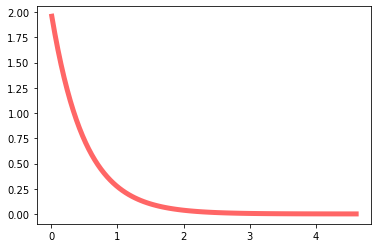

In [19]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x,loc=0, scale=(1/2)),
       'r-', lw=5, alpha=0.6, label='expon pdf')

The pdf curve should be similar to an exponential descending graph (lambda =  2, e^-2x). The graph should start from a positive value (x=0, f(x) = 2) and as x increases gradually decrease.

The area under the pdf curve in each interval should be equal to our result.

To assess our answers visually:

We can see that the pdf graph is relatively higher in the interval [0, 1] than [1, 10] and that is why our answer for the first interval is greater.

There is also the same situation for [0, +inf) and [1, 10]. Also, the area covered by the first interval is more than the second one. So, that is why our answer for the first interval is greater.

For [1, 1], the length of the interval is zero so the area under the graph is zero.

The area under [0, +inf) is more than [0, 1] so the answer is greater.

# Q4
(3 marks) Using the pdf method of scipy.stats.expon, define a function called expon_pdf which will
take one argument x and return the pdf of the probability measure Exp (2) evaluated at x. Import
the integration routine quad from scipy.integrate, and read the documentation https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html to see how it works. Use quad to compute and print the following integrals

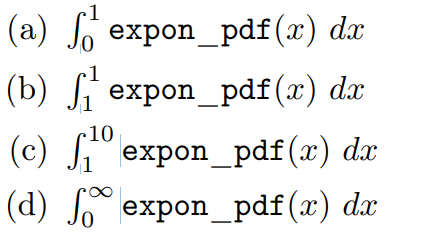

Compare your answers with those of the previous question. What do you see? Why is this the case?

In [20]:
from scipy.integrate import quad

expon_pdf = lambda x: expon.pdf(x, loc=0, scale=(1/2))

In [21]:
result = scipy.integrate.quad(expon_pdf, 0, 1)
print("{} \nerror : {}".format(result[0],{result[1]}))

0.8646647167633872 
error : {9.59970677131702e-15}


In [22]:
result = scipy.integrate.quad(expon_pdf, 1, 1)
print("{} \nerror : {}".format(result[0],{result[1]}))

0.0 
error : {0.0}


In [23]:
result = scipy.integrate.quad(expon_pdf, 1, 10)
print("{} \nerror : {}".format(result[0],{result[1]}))

0.13533528117545912 
error : {2.4502060294750595e-09}


In [24]:
result = scipy.integrate.quad(expon_pdf, 0, float('inf'))
print("{} \nerror : {}".format(result[0],{result[1]}))

1.0 
error : {1.5470063370305476e-10}


If we ignore the error, the answers for Q3 and Q4 are the same. This is because if we take the integral from the pdf function, we get cdf and if we calculate the derivative of the cdf function, we get pdf. So the area under the pdf curve is equal to cdf.